# Crude Oil Price Forecasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
data = pd.read_csv("spot-prices-for-crude-oil.csv")
data.head()

,Date;Brent Spot Price (U.S. Dollars per Barrel);WTI Spot Price (U.S. Dollars per Barrel)
0,2021-11-26;72.37;
1,2020-01-20;64.63;
2,2017-07-04;49.15;
3,2017-01-16;54.3;
4,2021-11-17;80.67;78.32


In [4]:
data = pd.read_csv("spot-prices-for-crude-oil.csv", sep=";", index_col="Date")
data.head()

,Brent Spot Price (U.S. Dollars per Barrel),WTI Spot Price (U.S. Dollars per Barrel)
Date,,
2021-11-26,72.37,NaN
2020-01-20,64.63,NaN
2017-07-04,49.15,NaN
2017-01-16,54.30,NaN
2021-11-17,80.67,78.32


In [5]:
data.rename(columns={'Brent Spot Price (U.S. Dollars per Barrel)': 'Brent Spot Price',
             'WTI Spot Price (U.S. Dollars per Barrel)': 'WTI Spot Price'},inplace=True)

In [6]:
data.head()

,Brent Spot Price,WTI Spot Price
Date,,
2021-11-26,72.37,NaN
2020-01-20,64.63,NaN
2017-07-04,49.15,NaN
2017-01-16,54.30,NaN
2021-11-17,80.67,78.32


In [7]:
df = data.drop("WTI Spot Price", axis = 1)
df.head()

,Brent Spot Price
Date,
2021-11-26,72.37
2020-01-20,64.63
2017-07-04,49.15
2017-01-16,54.30
2021-11-17,80.67


In [8]:
df.index = pd.to_datetime(df.index)
df.head()

,Brent Spot Price
Date,
2021-11-26,72.37
2020-01-20,64.63
2017-07-04,49.15
2017-01-16,54.30
2021-11-17,80.67


In [9]:
df1 = df.sort_values(by='Date')
df1.head()

,Brent Spot Price
Date,
2015-04-01,55.73
2015-04-02,55.73
2015-04-06,55.73
2015-04-07,57.55
2015-04-08,56.42


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2015-04-01 to 2021-11-29
Data columns (total 1 columns):
Brent Spot Price    1711 non-null float64
dtypes: float64(1)
memory usage: 26.8 KB


In [21]:
df1.describe()

,Brent Spot Price
count,1711.000000
mean,56.774296
std,13.772841
min,9.120000
25%,46.940000
50%,57.550000
75%,66.800000
max,86.070000


In [22]:
df1.isnull().sum()


Brent Spot Price    7
dtype: int64

In [23]:
df1.dropna(inplace=True)

In [15]:
df.isnull().sum()

Brent Spot Price    0
dtype: int64

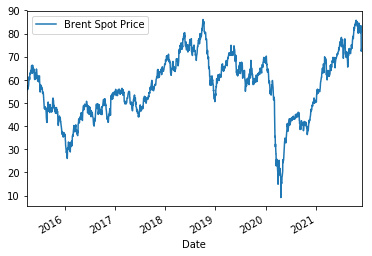

In [24]:
df1.plot()

In [18]:
# data is having irregular pattern, we need 
# to check stationarity of ts

In [25]:
df1.head()


,Brent Spot Price
Date,
2015-04-01,55.73
2015-04-02,55.73
2015-04-06,55.73
2015-04-07,57.55
2015-04-08,56.42


In [28]:
df1['2015-04-01':'2015-10-01']

,Brent Spot Price
Date,
2015-04-01,55.73
2015-04-02,55.73
2015-04-06,55.73
2015-04-07,57.55
2015-04-08,56.42
2015-04-09,56.04
2015-04-10,56.82
2015-04-13,57.14
2015-04-14,57.69


### Check Stationarity of a Time Series

In [29]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [36]:
def test_stationarity(ts):
    
    rollingmean = ts.rolling(window=12).mean()
    
    rollingstd = ts.rolling(window=12).std()
    
    original = plt.plot(ts, color='blue', label='Original')
    rollmean = plt.plot(rollingmean, color='red', label="Rolling Mean")
    rollstd = plt.plot(rollingstd, color='green', label="Rolling Std")
    plt.legend(loc="best",title="Rolling Mean and Std Deviation")
    plt.show()
    
    # Dieckey-Filler Test
    print("Dickey-Fuller Test Result")
    result = adfuller(ts)
    dfoutput = pd.Series(result[0:4], index=['Test Result', 'P Value',"#Lag", "No. of Observations"])
    for key,val in result[4].items():
        dfoutput['Critical Value (%s)'%key] = val
    print(dfoutput)
    

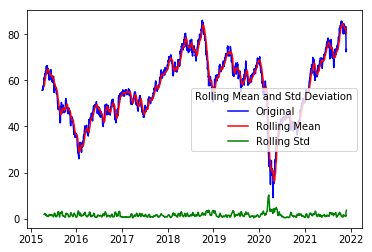

Dickey-Fuller Test Result
Test Result               -2.039571
P Value                    0.269496
#Lag                       7.000000
No. of Observations     1703.000000
Critical Value (10%)      -2.567674
Critical Value (5%)       -2.863239
Critical Value (1%)       -3.434196
dtype: float64


In [37]:
test_stationarity(df1)

#### Differencing

In [38]:
df1['first_diff'] = df1["Brent Spot Price"]- df1['Brent Spot Price'].shift(1)

In [39]:
df1.head()

,Brent Spot Price,first_diff
Date,,
2015-04-01,55.73,NaN
2015-04-02,55.73,0.00
2015-04-06,55.73,0.00
2015-04-07,57.55,1.82
2015-04-08,56.42,-1.13


In [40]:
df1['Brent Spot Price'].shift(1)

Date
2015-04-01      NaN
2015-04-02    55.73
2015-04-06    55.73
2015-04-07    55.73
2015-04-08    57.55
2015-04-09    56.42
2015-04-10    56.04
2015-04-13    56.82
2015-04-14    57.14
2015-04-15    57.69
2015-04-16    59.32
2015-04-17    60.13
2015-04-20    61.31
2015-04-21    61.20
2015-04-22    60.12
2015-04-23    60.12
2015-04-24    62.66
2015-04-27    62.96
2015-04-28    62.86
2015-04-29    62.61
2015-04-30    63.97
2015-05-01    63.90
2015-05-04    64.13
2015-05-05    64.62
2015-05-06    65.44
2015-05-07    66.22
2015-05-08    64.93
2015-05-11    63.82
2015-05-12    62.82
2015-05-13    65.09
              ...  
2021-10-19    84.13
2021-10-20    85.02
2021-10-21    85.76
2021-10-22    84.58
2021-10-25    85.43
2021-10-26    84.85
2021-10-27    85.11
2021-10-28    84.12
2021-10-29    83.40
2021-11-01    83.10
2021-11-02    84.51
2021-11-03    84.42
2021-11-04    81.10
2021-11-05    80.15
2021-11-08    82.43
2021-11-09    83.22
2021-11-10    84.52
2021-11-11    82.91
2021-11-12    8

In [42]:
df1

,Brent Spot Price,first_diff
Date,,
2015-04-01,55.73,NaN
2015-04-02,55.73,0.00
2015-04-06,55.73,0.00
2015-04-07,57.55,1.82
2015-04-08,56.42,-1.13
2015-04-09,56.04,-0.38
2015-04-10,56.82,0.78
2015-04-13,57.14,0.32
2015-04-14,57.69,0.55


In [43]:
df1['seasonal_diff'] = df1['Brent Spot Price']-df1['Brent Spot Price'].shift(12)

In [44]:
df1.head(13)

,Brent Spot Price,first_diff,seasonal_diff
Date,,,
2015-04-01,55.73,NaN,NaN
2015-04-02,55.73,0.00,NaN
2015-04-06,55.73,0.00,NaN
2015-04-07,57.55,1.82,NaN
2015-04-08,56.42,-1.13,NaN
2015-04-09,56.04,-0.38,NaN
2015-04-10,56.82,0.78,NaN
2015-04-13,57.14,0.32,NaN
2015-04-14,57.69,0.55,NaN


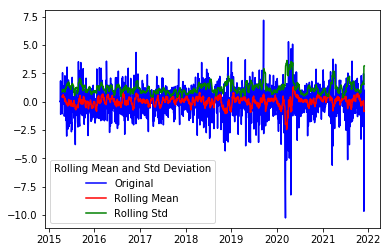

Dickey-Fuller Test Result
Test Result            -1.388520e+01
P Value                 6.108124e-26
#Lag                    6.000000e+00
No. of Observations     1.703000e+03
Critical Value (10%)   -2.567674e+00
Critical Value (5%)    -2.863239e+00
Critical Value (1%)    -3.434196e+00
dtype: float64


In [46]:
df1['first_diff'].dropna(inplace=True)
test_stationarity(df1['first_diff'])

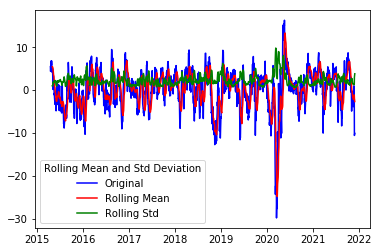

Dickey-Fuller Test Result
Test Result               -5.584712
P Value                    0.000001
#Lag                      25.000000
No. of Observations     1673.000000
Critical Value (10%)      -2.567691
Critical Value (5%)       -2.863269
Critical Value (1%)       -3.434265
dtype: float64


In [47]:
df1['seasonal_diff'].dropna(inplace=True)
test_stationarity(df1['seasonal_diff'])

### Autocorrelation

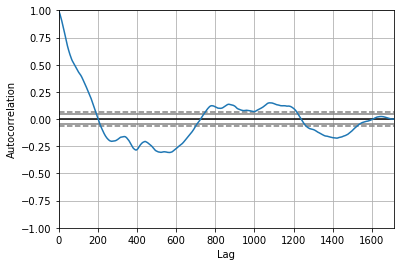

In [50]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['Brent Spot Price'])
plt.show()

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

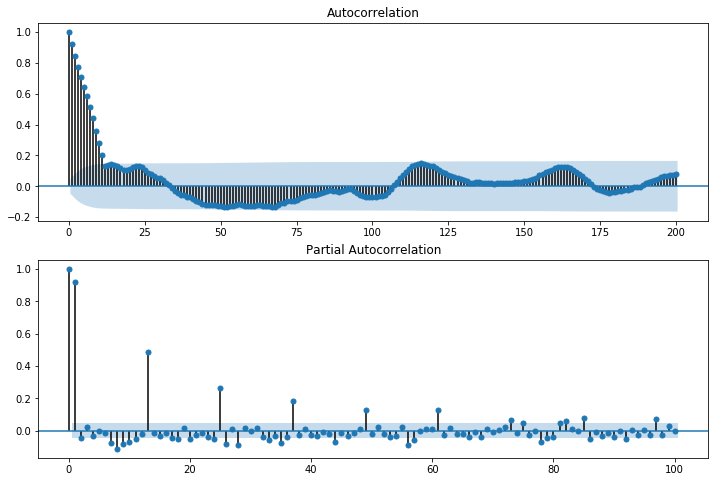

In [55]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df1['seasonal_diff'].iloc[13:],lags=200,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df1['seasonal_diff'].iloc[13:],lags=100,ax=ax2)

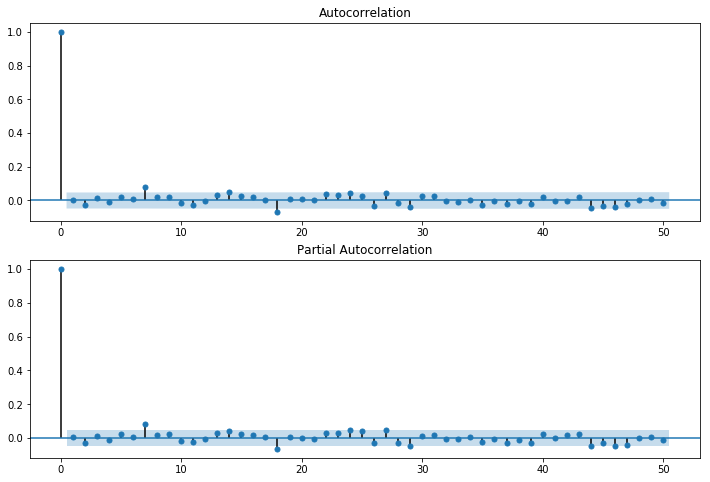

In [58]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df1['first_diff'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df1['first_diff'].iloc[13:],lags=50,ax=ax2)

In [59]:
from statsmodels.tsa.arima_model import ARIMA

In [61]:
model = ARIMA(df1['Brent Spot Price'], order=(1,1,1))
model_fit = model.fit()

/home/speed/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [63]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Brent Spot Price   No. Observations:                 1710
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2885.351
Method:                       css-mle   S.D. of innovations              1.308
Date:                Sun, 05 Dec 2021   AIC                           5778.701
Time:                        12:52:06   BIC                           5800.478
Sample:                             1   HQIC                          5786.761
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0104      0.032      0.324      0.746      -0.052       0.073
ar.L1.D.Brent Spot Price    -0.9068      0.066    -13.832      0.000      -1.035      -0.778
ma.L1.D.Brent Spot Price     0.9291      0.057     16.202      0.000       0.817       1.042
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1028           +0.0000j            1.1028            0.5000
MA.1           -1.0763           +0.0000j            1.0763            0.5000
-----------------------------------------------------------------------------
"""

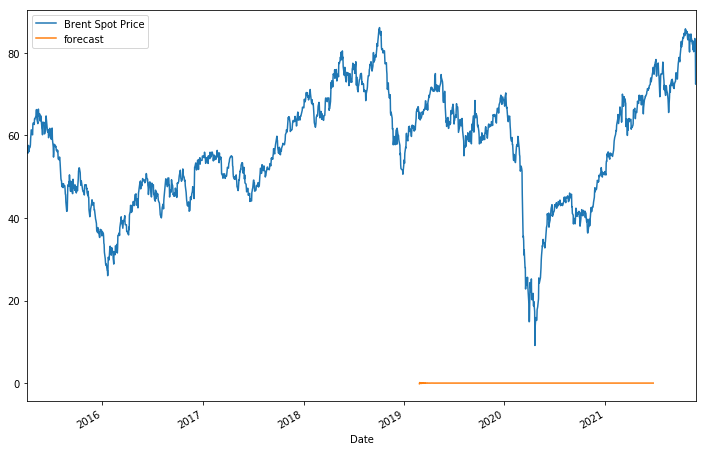

In [64]:
df1['forecast'] = model_fit.predict(start=1000, end=1600, dynamic=True)
df1[['Brent Spot Price','forecast']].plot(figsize=(12,8))

In [65]:
import statsmodels.api as sm

In [66]:
model=sm.tsa.statespace.SARIMAX(df1['Brent Spot Price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/home/speed/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


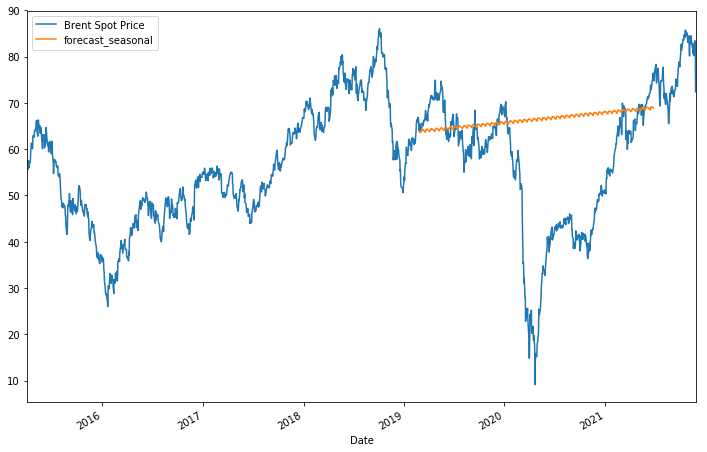

In [67]:
df['forecast_seasonal']=results.predict(start=1000,end=1600,dynamic=True)
df[['Brent Spot Price','forecast_seasonal']].plot(figsize=(12,8))

In [76]:
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1]+ DateOffset(days=x)for x in range(0,360)]

In [77]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [78]:
future_datest_df.tail(15)

,Brent Spot Price,first_diff,seasonal_diff,forecast
2022-11-09,NaN,NaN,NaN,NaN
2022-11-10,NaN,NaN,NaN,NaN
2022-11-11,NaN,NaN,NaN,NaN
2022-11-12,NaN,NaN,NaN,NaN
2022-11-13,NaN,NaN,NaN,NaN
2022-11-14,NaN,NaN,NaN,NaN
2022-11-15,NaN,NaN,NaN,NaN
2022-11-16,NaN,NaN,NaN,NaN
2022-11-17,NaN,NaN,NaN,NaN
2022-11-18,NaN,NaN,NaN,NaN


In [79]:
future_df=pd.concat([df1,future_datest_df])

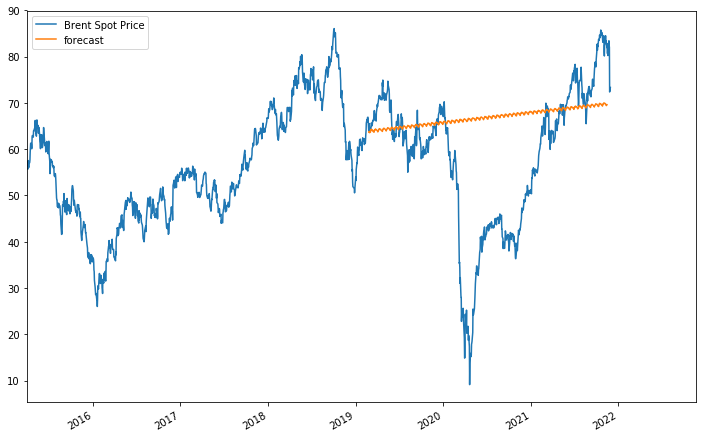

In [80]:
future_df['forecast'] = results.predict(start = 1000, end = 1700, dynamic= True)  
future_df[['Brent Spot Price', 'forecast']].plot(figsize=(12, 8)) 